<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Estadística Computacional 2 </H1>

<H3> INF-280 Estadística Computacional </H3>
<H3> Autor: Francisco Andrades </H3>

Lenguaje: R

Temas:

    - Test de Hipótesis
    - Bootstrap
    - Intervalos de Confianza
    - Regresión Lineal
<hr style="height:2px;border:none"/>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab4.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Consideración

>En este laboratorio se evaluará el uso correcto de una semilla para replicar sus ejecuciones y observar los mismos resultados, el no cumplimiento de esto implica un descuento de 10 puntos en su nota.

## 1. Test de Hipótesis (25p)

Muchos procesos estadísticos utilizados asumen la normalidad de los datos para poder trabajar, la normalidad de los datos simplifica el trabajo en muchos casos, pero, ¿es posible asumir siempre esta normalidad?, como la respuesta es claramente "no" en esta sección trabajará el [Test de hipótesis de Shapiro-Wilks](http://riotorto.users.sourceforge.net/R/noparam_shapiro/) cuya utilidad es poder determinar si un conjunto de datos sigue una distribución normal o no. (Queda propuesto para el estudiante investigar más sobre este test)

Recordando el trabajo realizado en el laboratorio anterior, respecto al teorema del límite central, utilizaremos la misma distribución dada para trabajar con este test de hipótesis 

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

Se trabajará con 3 muestras:

* Una muestra de tamaño 1000 de la población original (distribución dada)
* La distribución de 1000 medias de muestras de tamaño 12 
* La distribución de 1000 medias de muestras de tamaño 120

>a) A priori ¿Qué muestra/s esperaría usted que siguieran una distribución normal? ¿Cuáles no? Responda utilizando el teorema del límite central. (Independiente de lo que obtenga en b), el puntaje se dará según la justificación que se de)

Como la segunda y tercera muestra siguen los pasos realizados en el laboratorio 3 para la comprobación del TLC, debiesen estos seguir la distribución normal. Por lo mismo, al no seguir los pasos anteriormente mencionados, la primera muestra debiese a priori no seguir la distribución normal.

>b) Realice el test de hipótesis de shapiro-wilk **utilizando las funciones provistas por los lenguajes** y comente las muestras que cumplen con la normalidad de datos y las que no bajo un nivel de significancia del 1% y 5%. Compare los resultados que obtiene con cada nivel de significancia para cada muestra y comente.

In [47]:
set.seed(1)

P <- 1000

P1000a <- sample(c(1,2,5,6,7,9,10,11,12), 1000, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05))
#P1000a

P1000b <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 12, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/12})
#P1000b

P1000c <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 120, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/120})
#P1000c

shapiro.test(P1000a)
shapiro.test(P1000b)
shapiro.test(P1000c)




	Shapiro-Wilk normality test

data:  P1000a
W = 0.88319, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  P1000b
W = 0.9978, p-value = 0.2088



	Shapiro-Wilk normality test

data:  P1000c
W = 0.9981, p-value = 0.327


En primera instancia, se debe considerar que en ninguno de los tres casos la hipótesis nula se rechaza debido al valor de W. Lo anterior, puesto que es un valor muy lejano a 0 y cercano a 1.

Posteriormente, fijar atención en el p-valor para aceptar/rechazar la hipótesis nula. 

Es posible notar que el p-valor correspondiente a la primera muestra es menor a ambos niveles de significancia $\alpha = 0.01$ y a $\alpha = 0.05$, por lo que se rechaza la hipótesis nula, concluyendo así que no sigue una distribución normal.

De la misma forma, notar p-valor para la segunda y tercera muestra, el cual en ambos casos es mayor a los dos niveles de significancia $\alpha = 0.01$ y a $\alpha = 0.05$, por lo que no se rechaza la hipótesis nula, concluyendo así que siguen una distribución normal.

>c) ¿Qué sucede a medida que el nivel de significancia se acerca a 0? ¿Qué puede concluir acerca del nivel de significancia que se utiliza?

A medida que el nivel de significancia $\alpha$ se acerca a $0$, ayuda a conocer con mayor confianza si una muestra corresponde o no a una distribución normal. Sin embargo, aumenta la probabilidad de aceptar una hipótesis nula falsa. Lo anterior, puesto que hay mayor cantidad de hipótesis con un p-valor mayor al nivel de significancia, por lo que las mismas no pueden ser rechazadas. Con esto se dice que el estudio pierde potencia.

## 2. Bootstrap e Intervalos de Confianza (30p) 

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

En esta sección trabajará con una muestra de una población $N\sim (50,20)$ muestra.csv

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

>*Construir intervalos de confianza bootstrap queda pendiente para el estudiante* 

Nos interesará probar la construcción de un intervalo de confianza para la media y desviación estándar utilizando solamente la muestra de esta población. 

>a) Utilizando el método bootstrap **a mano** (no funciones de los lenguajes) construya 1000 intervalos de confianza para la media y la desviación estándar, luego grafique cada intervalo y el valor teórico de la media/varianza y concluya respecto a lo que observa. Haga este proceso para un nivel de significancia de 85%, 95% y 99%, comente lo que observe y concluya. 

*PD: La ausencia de conclusión respecto a los distintos niveles de significancia implica 0 puntos en la pregunta*

> **Hint:** Puede contrastar lo obtenido con lo esperado

Se procedió a realizar lo solicitado en el enunciado, la construcción de 1000 intervalos de confianza a partir de la **misma muestra** para la media y la varianza utilizando cada nivel de significancia indicado. Se graficó cada uno de estos intervalos comparándolos con el valor teórico del parámetro pertinente, representando en negro los que incluyeron el valor real y en rojo los que no. A continuación los gráficos.

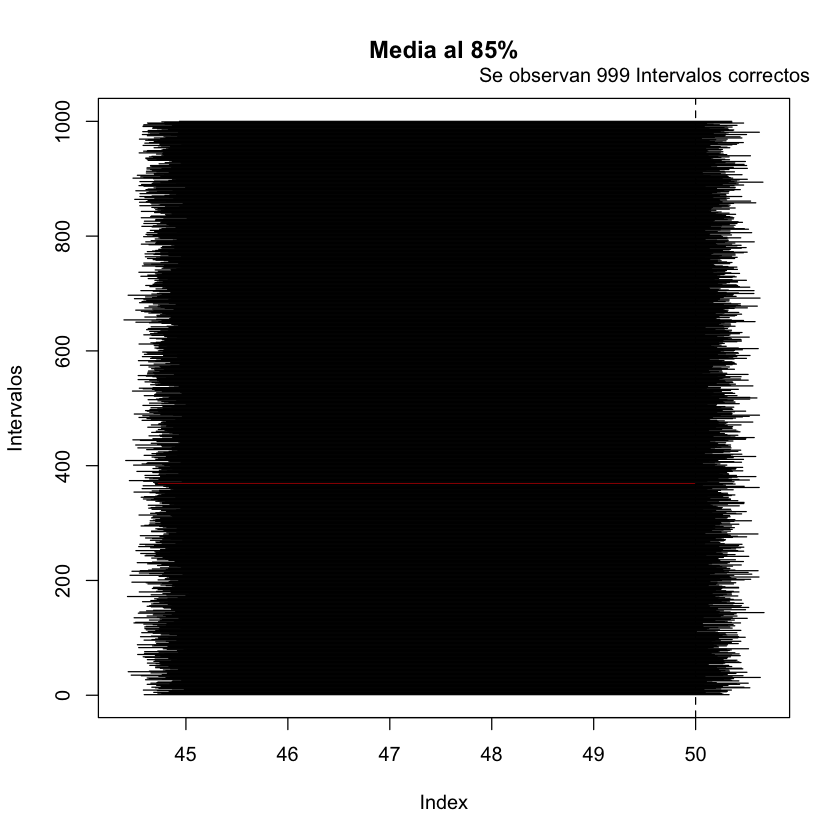

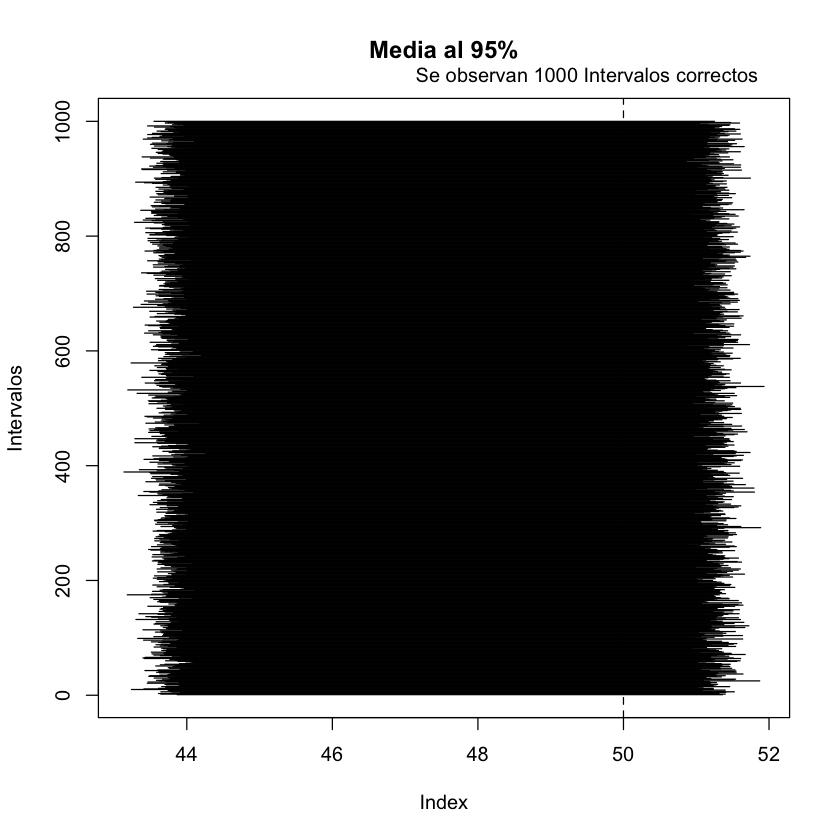

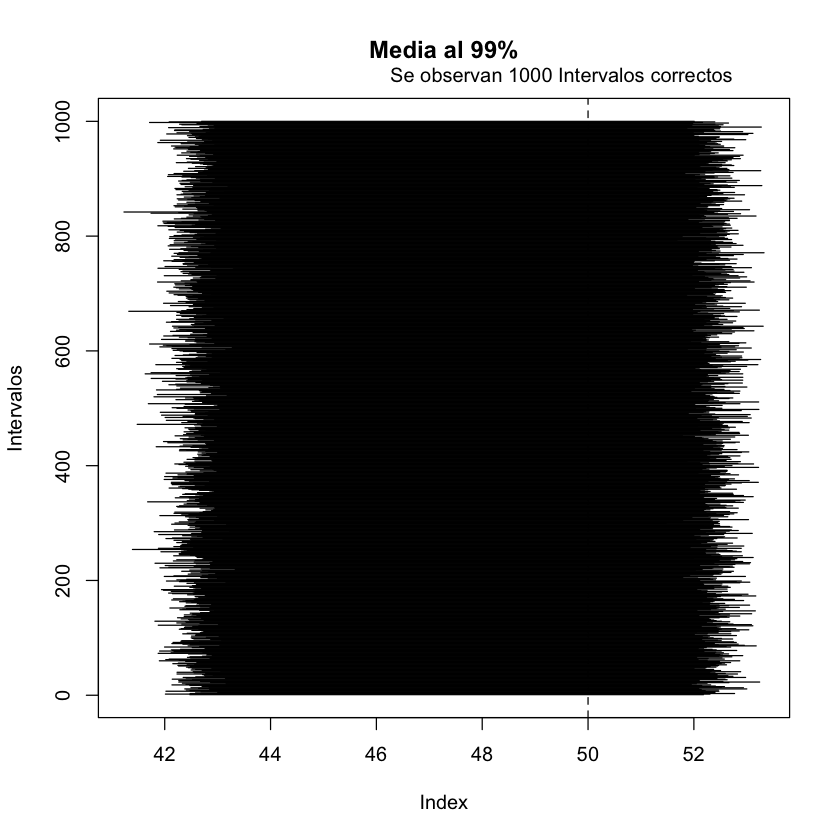

In [204]:
#------ Media ------#
set.seed(2)
tabla <- read.csv("muestra.csv")
h <- tabla$valor
#85
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 85% de significancia, usamos los valores b[75] = limite superior, b[925] = limite inferior
        lim <- c(b[75], b[925])
})

#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main = "Media al 85%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)

#95
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 95% de significancia, usamos los valores b[25] = limite inferior, b[975] = limite superior
        lim <- c(b[25], b[975])
})

#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Media al 95%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)

#99
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 99% de significancia, usamos los valores b[5] = limite superior, b[995] = limite inferior
        lim <- c(b[5], b[995])
})


#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Media al 99%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)

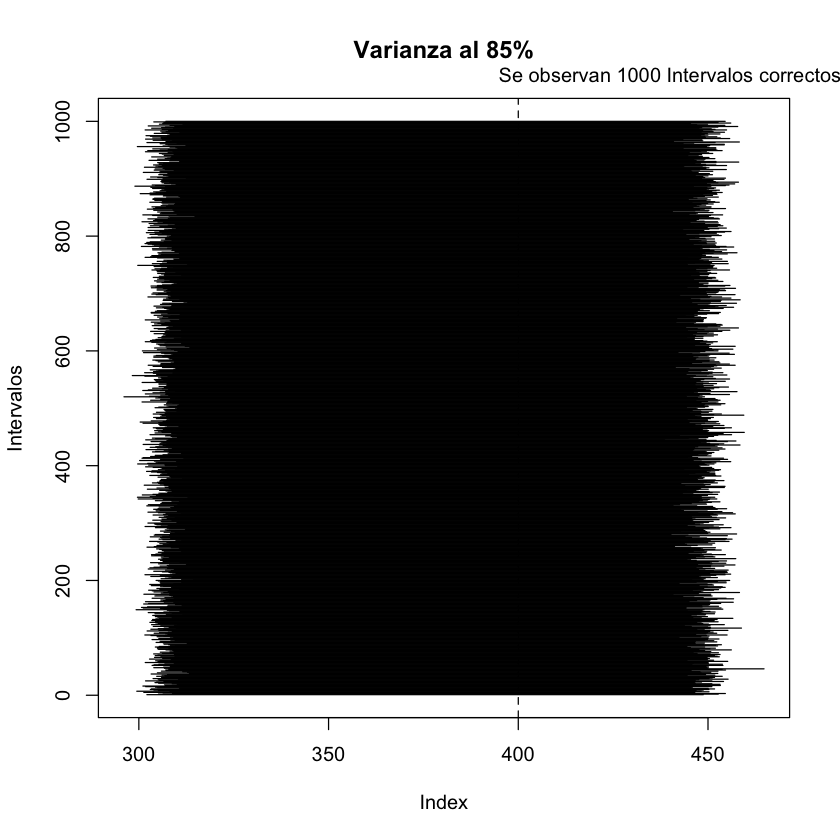

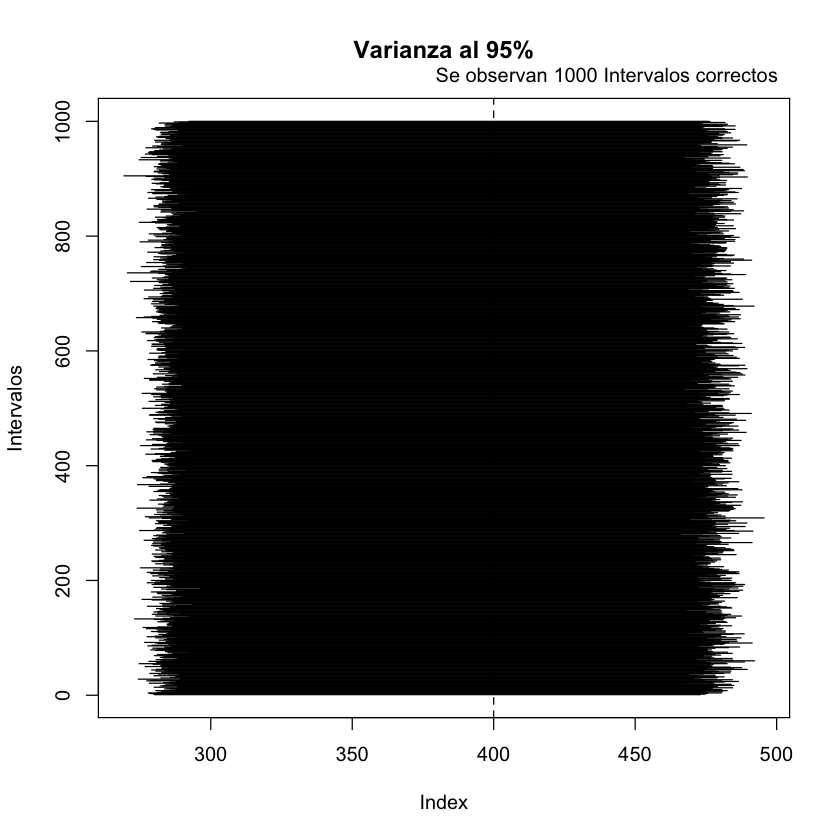

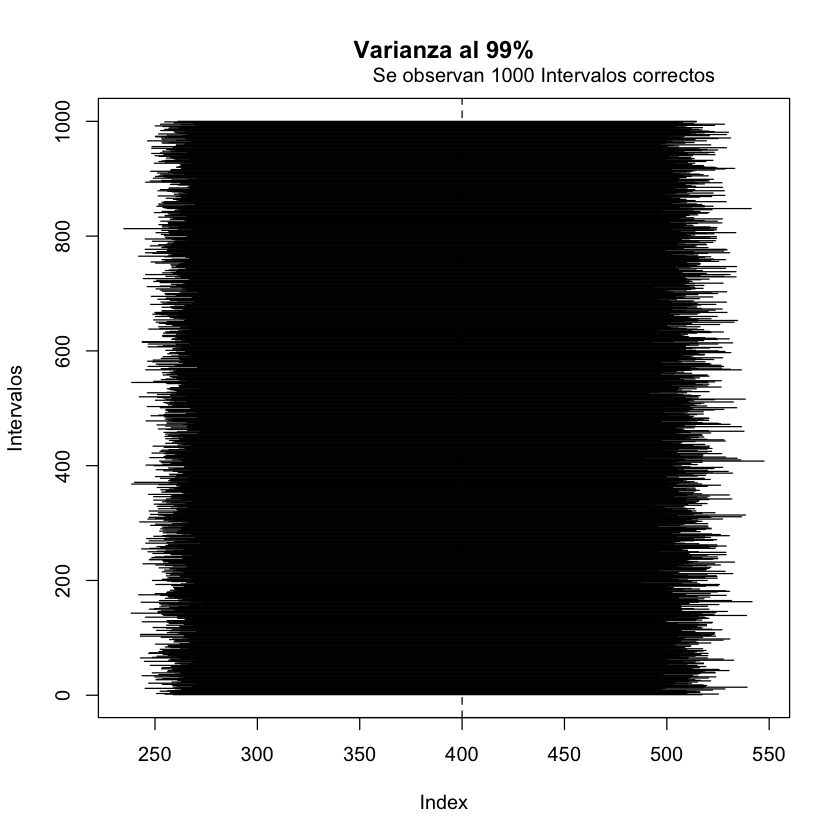

In [203]:
#------ Varianza ------#
set.seed(2)
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)
        #Como es 85% de significancia, usamos los valores b[75] = limite superior, b[925] = limite inferior
        lim <- c(b[75], b[925])
})

#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 85%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)

#95
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)

        #Como es 95% de significancia, usamos los valores b[25] = limite superior, b[975] = limite inferior
        lim <- c(b[25], b[975])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 95%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)


#99
z <- replicate(n = 1000,{
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)
        #Como es 99% de significancia, usamos los valores b[5] = limite superior, b[995] = limite inferior
        lim <- c(b[5], b[995])
})

#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 99%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)

Para un correcto análisis de estos datos, se debe comprender como interpretar un intervalo de confianza con cierto nivel de significancia.
El hecho de que un intervalo de confianza tenga un nivel de significancia (digamos 95%), implica que si se generan X cantidad de intervalos con el mismo procedimiento, el 95% de éstos incluirá el valor real. 
Habiendo estipulado esto, se podría razonar que la generación de 1000 intervalos para cada caso resultaría en un porcentaje inequívoco de intervalos "erróneos", es decir, que **no** incluyen el valor real. A modo de ejemplo, el resultado esperado para un nivel de significancia de 95% serían 950 intervalos correctos y 50 intervalos erróneos.

Se puede apreciar fácilmente que este no es el caso.

¿Por qué el procedimiento no está resultando como debería?

La respuesta a esto es, de hecho, bastante simple. La relevancia del nivel de significancia radica en la generación de distintos intervalos de confianza. 

El fundamento del problema se basa en lo siguiente: **Una muestra genera un intervalo de confianza**. Si generamos 1000 intervalos de confianza a partir de la **misma muestra**, obtenemos esencialmente el mismo intervalo, repetido 1000 veces.
        
El porcentaje de intervalos correctos y erróneos que se pueden apreciar en los gráficos generados, simplemente representan que el intervalo de confianza a partir de la muestra indicada si incluye el valor real. (Entendiendo los intervalos erróneos como despreciables).

Para un correcto análisis del nivel de significancia de los intervalos de confianza generados mediante bootstrap, se repitió el procedimiento, esta vez utilizando distintas muestras aleatorias de la distribución normal indicada, para cada intervalo. A continuación, los gráficos.


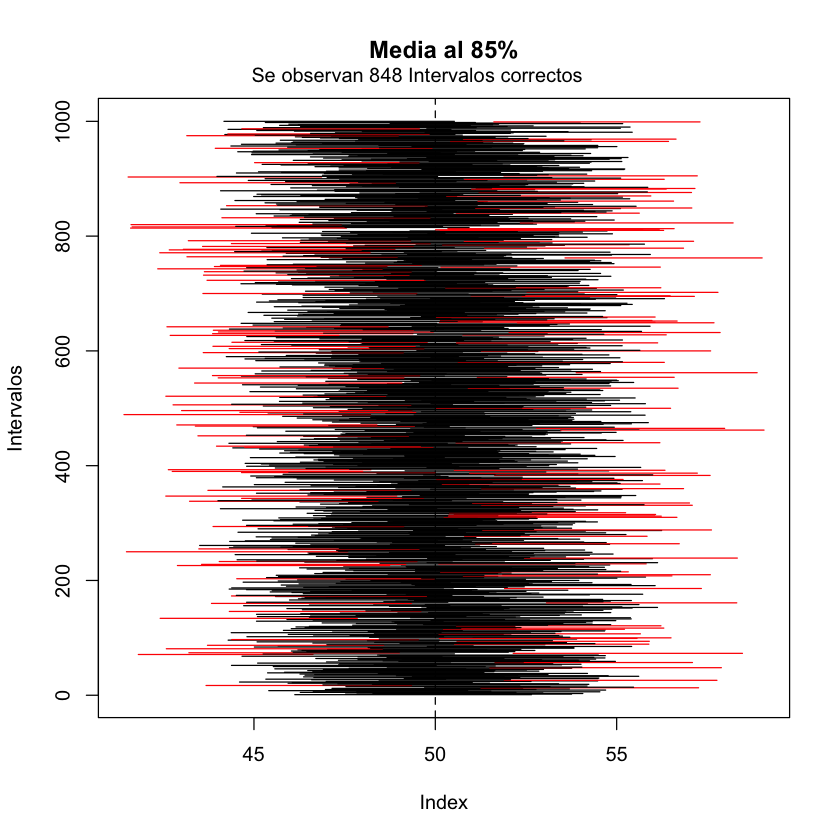

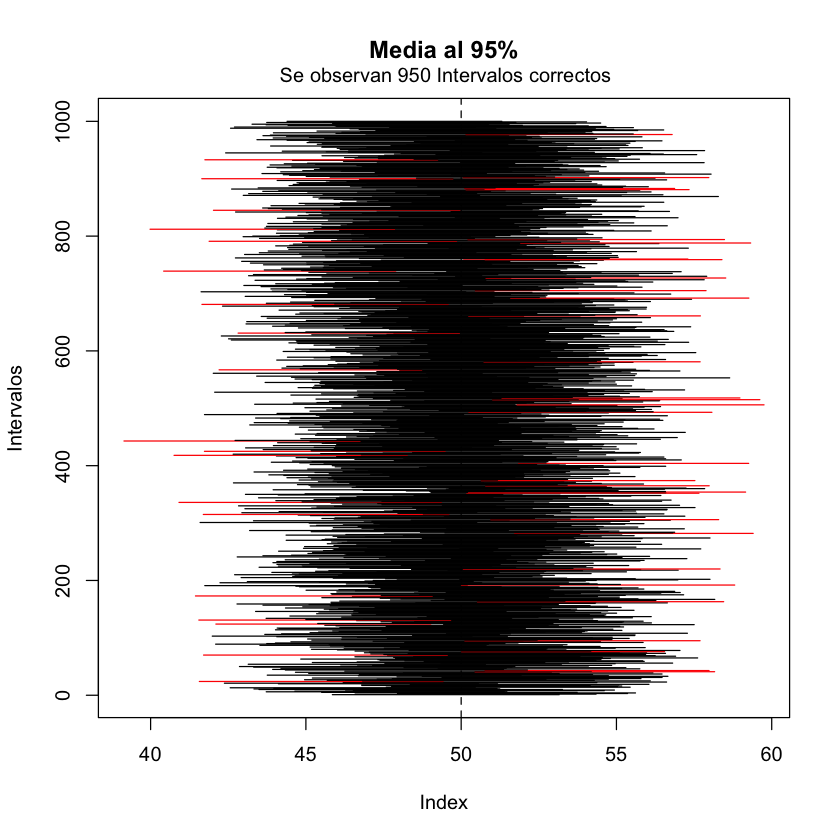

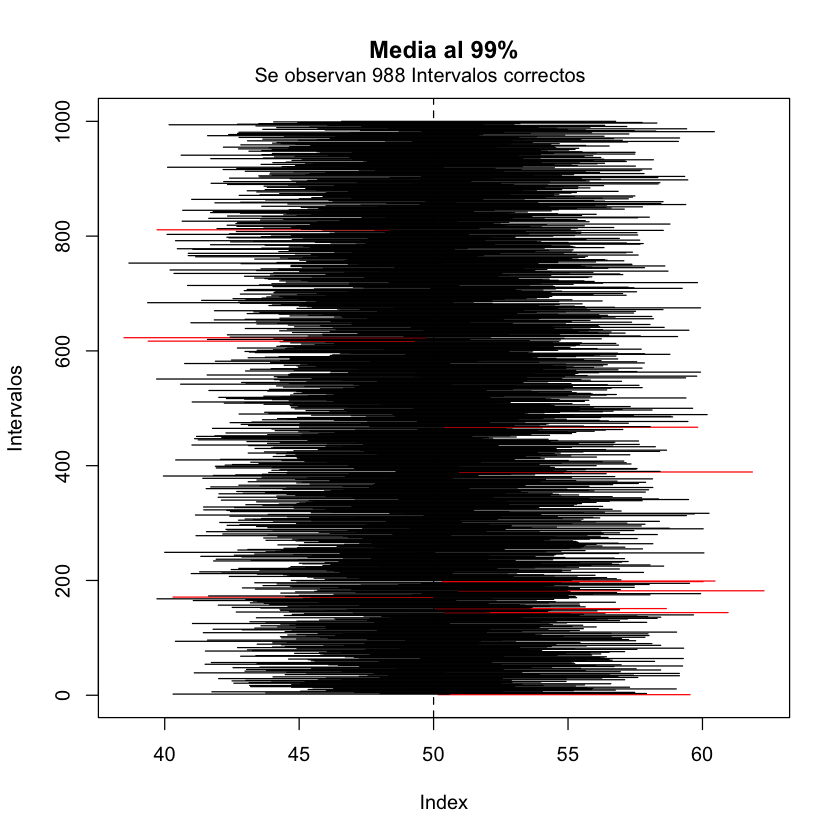

In [202]:
#------ Media ------#
set.seed(2)
#85
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 85% de significancia, usamos los valores b[75] = limite superior, b[925] = limite inferior
        lim <- c(b[75], b[925])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main= "Media al 85%", type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)


#95
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 95% de significancia, usamos los valores b[25] = limite superior, b[975] = limite inferior
        lim <- c(b[25], b[975])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Media al 95%" , type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)

#99
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- sum(sample(h, 100, replace = TRUE))/100})
        b <- sort(x)
        #Como es 99% de significancia, usamos los valores b[5] = limite superior, b[995] = limite inferior
        lim <- c(b[5], b[995])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))


plot(1:1000,main ="Media al 99%" ,type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 50, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 50 | z[i,2] < 50){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 50 | z$X2 < 50)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=49.5)


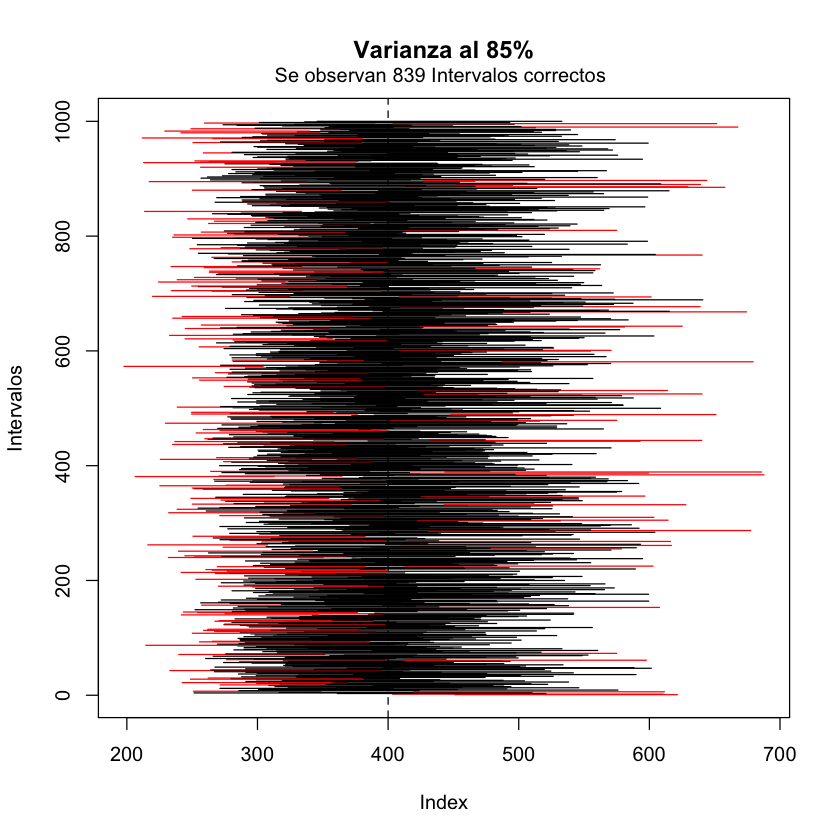

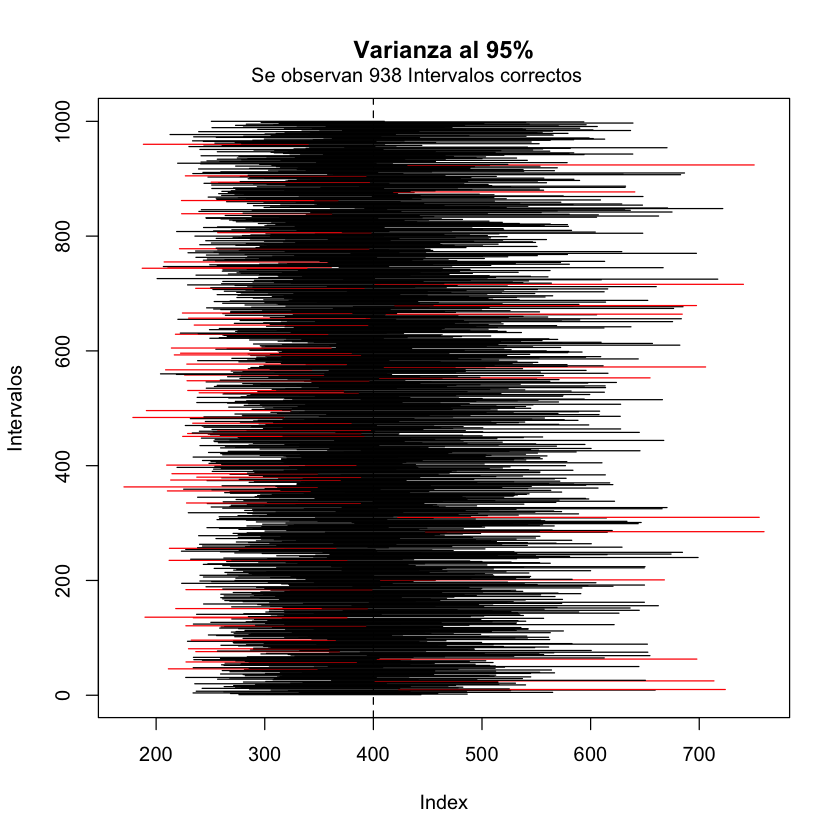

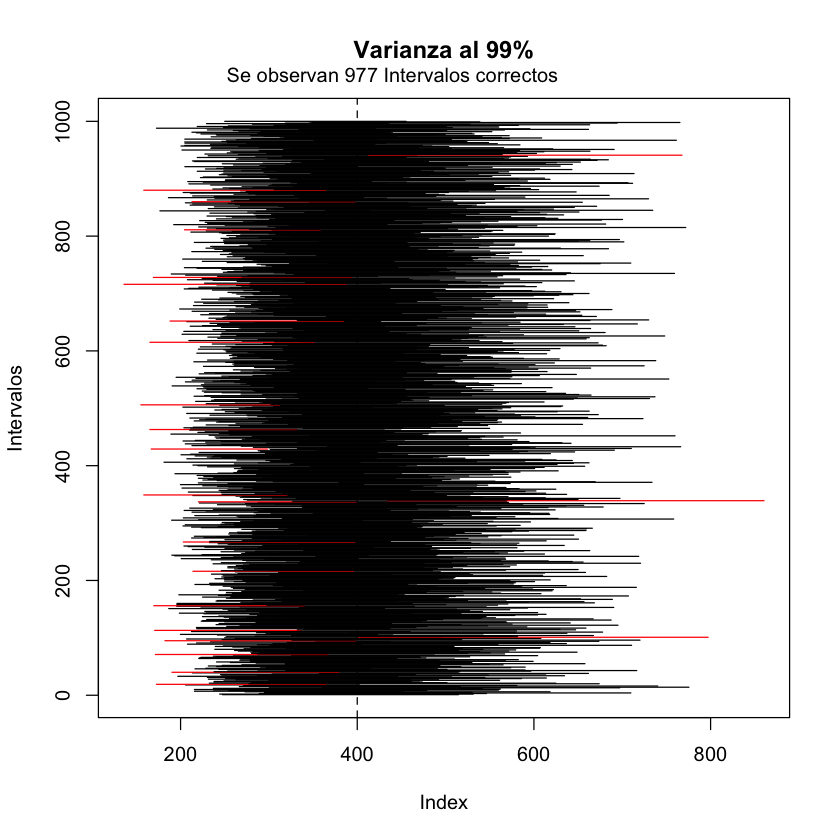

In [201]:
#------ Varianza ------#
set.seed(2)
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)

        #Como es 85% de significancia, usamos los valores b[75] = limite superior, b[925] = limite inferior
        lim <- c(b[75], b[925])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 85%", type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)


#95
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)
        #Como es 95% de significancia, usamos los valores b[25] = limite superior, b[975] = limite inferior
        lim <- c(b[25], b[975])
})



#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 95%", type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)


#99
z <- replicate(n = 1000,{
        h <- rnorm(100, mean=50,sd=20)
        #Obtenemos las cien medias, de n = cien muestras.
        x <- replicate(n = 1000, {prom <- var(sample(h, 100, replace = TRUE))})
        b <- sort(x)

        #Como es 99% de significancia, usamos los valores b[5] = limite superior, b[995] = limite inferior
        lim <- c(b[5], b[995])
})


#Creamos tabla z donde primera columna es el limite inferior y la segunda columna limite superior.
z <- data.frame(t(z))

plot(1:1000,main="Varianza al 99%", type = "n",
     xlim = range(z),
     ylab = "Intervalos")

abline(v = 400, lty = 2)

for(i in 1:1000){
    if(z[i,1] > 400 | z[i,2] < 400){    
        segments(z[i,1],i,z[i,2],i,col = "red")}
    else {segments(z[i,1],i,z[i,2],i)}}
text <- paste(c("Se observan ",nrow(subset(z, !(z$X1 > 400 | z$X2 < 400)))," Intervalos correctos"),collapse = "")
mtext(text,side=3,line=0.5,at=440)



Ciertamente un resultado más coherente.

Sobre la media.

Para un nivel de significancia del 85%:
    
    Se observan 848 intervalos correctos, correspondientes al 84,8% del total

Para un nivel de significancia del 95%:
    
    Se observan 950 intervalos correctos, correspondientes al 95,0% del total
    
Para un nivel de significancia del 99%:

    Se observan 988 intervalos correctos, correspondiente al 98,8% del total
    
Sobre la varianza:

Para un nivel de significancia del 85%:
    
    Se observan 839 intervalos correctos, correspondientes al 83,9% del total

Para un nivel de significancia del 95%:
    
    Se observan 938 intervalos correctos, correspondientes al 93,8% del total
    
Para un nivel de significancia del 99%:

    Se observan 977 intervalos correctos, correspondiente al 97,7% del total
    
  
En conclusión, el porcentaje de intervalos correctos corresponde, en efecto, al nivel de significancia que se utilizó para generarlos.
    


## 3. Regresión Lineal (45p)

Uno de los aspectos más importantes de estadística es el análisis de la relación entre dos variables, uno de los modelos más simples para esto es la *Regresión Lineal Simple* donde se estudia una relación lineal entre la variable dependiente e independiente, esto no tiene por qué solamente ser univariado (X e Y) si no que puede ser también multivariado donde se tiene un vector de variables independientes que determinan a una variable de interés.

La regresión lineal simple de mínimos cuadrados es un modelo para representar una relación lineal entre dos variables mediante la ecuación: $Y = a\cdot X + b + \epsilon$. Este será el modelo que se trabajará en esta sección.

Se trabajará con LRData.csv 

>a) Construya un modelo de regresión lineal donde X sea la variable independiente y la columna "Valor" la variable dependiente, luego calcule el MSE (mean standard error) de su modelo 

$$ MSE = \frac{\sum \left(\hat{Y_{i}}- Y_{i}\right)^{2}}{n} $$

$$\hat{Y}: \; prediccion$$

$$Y: \; valor\, verdadero$$

In [2]:
testeo <- read.csv("LRData.csv")

#Vemos si existe relación lineal entre las variables:
cor.test(testeo$x, testeo$y)

cat("--------------")
#Aplicamos regresión lineal:
fit <- lm(y ~ x, testeo)
summary(fit)


	Pearson's product-moment correlation

data:  testeo$x and testeo$y
t = 208.6, df = 1998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9757932 0.9796486
sample estimates:
      cor 
0.9778035 


--------------


Call:
lm(formula = y ~ x, data = testeo)

Residuals:
    Min      1Q  Median      3Q     Max 
-948.70 -135.87   29.43  197.97  787.19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -774.31578   13.69078  -56.56   <2e-16 ***
x              2.47422    0.01186  208.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 306.3 on 1998 degrees of freedom
Multiple R-squared:  0.9561,	Adjusted R-squared:  0.9561 
F-statistic: 4.351e+04 on 1 and 1998 DF,  p-value: < 2.2e-16


Las variables presentan un alto grado de correlación $0.9778035$, además de ser positivo. Por lo anterior, los valores bajos de una variable corresponden a los valores bajos de la otra variable y que los valores altos de una variable corresponden a los valores altos de la otra variable. Por lo anterior, se procede a realizar modelo de regresión lineal simple.
Con la regresión lineal obtenemos el valor en el que intercepta al eje y $intercept = -774.31578$ y el valor que acompaña a x la $pendiente = 2.47422$

In [3]:
#y = -774.31578 + 2.47422x
funcion_prediccion <- function(x){
    return (-774.31578 + 2.47422*x)
}
#retorna elemento de la columna y en la posicion z dada.
funcion_vverdadero <- function(z){
    return (subset(testeo$y, testeo$x == z))
}

#retorna valor de MSE.
funcion_mse <- function(z){
    mse <- 0
    i <- 0
    while(i <= z){
        sumando <- (funcion_prediccion(i) - funcion_vverdadero(i))^2
        mse <- mse + sumando
        i <- i + 1
    }
    return (mse/i)
}

#Son 2000 elementos, pero parte del 0. Por lo que calcular la funcion de 1999 es calcularla para los 2000 elementos.
cat("Valor MSE: ")
funcion_mse(1999)

Valor MSE: 

[1] 93695.3

>b) Construya un scatterplot donde grafique tanto los valores predichos por el modelo como los valores originales de la variable dependiente en función de X. Al observar el gráfico ¿cree que sería posible mejorar el MSE obtenido en a)?

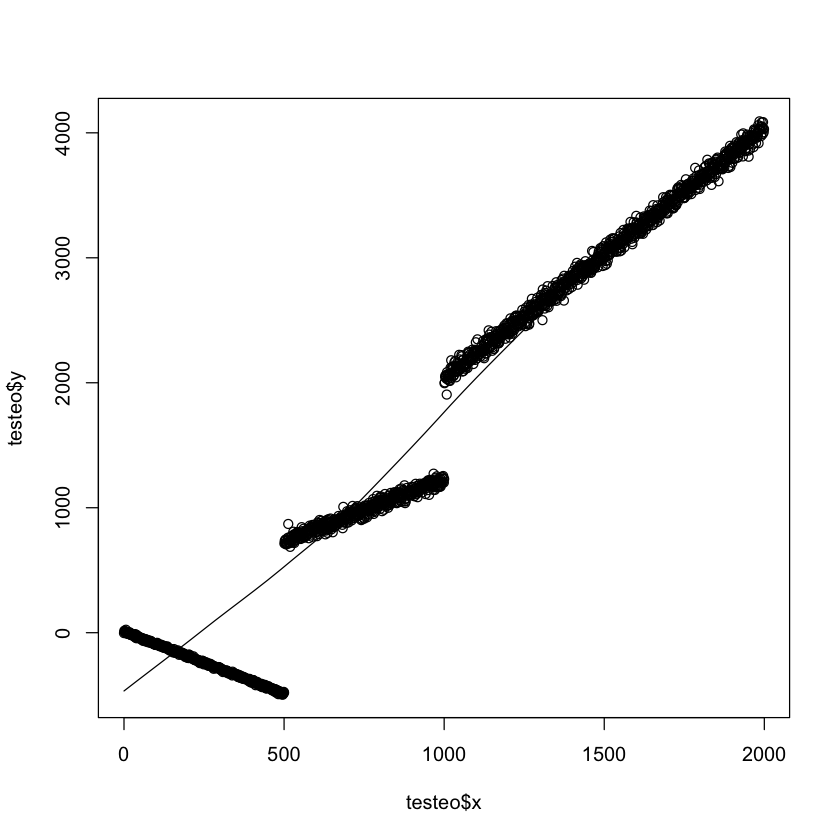

In [4]:
scatter.smooth(x = testeo$x, y = testeo$y)

Sí, es posible mejorar el modelo. Se puede ver que el ajuste lineal tiene pendiente positiva en todo el gráfico. Lo anterior, no es correcto para el primer tramo. Si solamente se usara ese tramo, correspondería una pendiente negativa. Por lo mismo, para mejorar el modelo, se debe hacer regresión segmentada o por tramos. A partir del dato 501(lo incluye), comienzan los datos ajustados con pendiente positiva.

>c) Si en b) respondió que no, saltese esta pregunta, caso contrario, implemente su solución, verifique el MSE disminuye y vuelva a graficar los valores.

In [5]:
#Al graficar puede apreciarse que a partir del dato 501 comienzan datos con pendiente positiva.
infl <- 501
#Al graficar puede apreciarse que a partir del dato 1001 comienzan datos con pendiente positiva y más inclinada.
infl2 <- 1001


#Valores con pendiente negativa tramo 1.
a <- subset(testeo, testeo$x < infl)
cor.test(a$x, a$y)
fit2 <- lm(y ~ x, a)
summary(fit2)

cat("---------------")

#Valores con pendiente positiva tramo 2.
b <- subset(testeo, testeo$x >= infl & testeo$x < infl2)
cor.test(b$x, b$y)
fit3 <- lm(y ~ x, b)
summary(fit3)

cat("---------------")

#Valores con pendiente positiva tramo 3.
c <- subset(testeo, testeo$x >= infl2)
cor.test(c$x, c$y)
fit4 <- lm(y ~ x, c)
summary(fit4)

#scatter.smooth(x = a$x, y = a$y)
#scatter.smooth(x = b$x, y = b$y)
#scatter.smooth(x = c$x, y = c$y)


	Pearson's product-moment correlation

data:  a$x and a$y
t = -471.08, df = 499, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9990583 -0.9986622
sample estimates:
       cor 
-0.9988776 



Call:
lm(formula = y ~ x, data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4667  -4.6511   0.3588   4.3690  20.3159 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.463187   0.611651   15.47   <2e-16 ***
x           -0.997633   0.002118 -471.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.856 on 499 degrees of freedom
Multiple R-squared:  0.9978,	Adjusted R-squared:  0.9978 
F-statistic: 2.219e+05 on 1 and 499 DF,  p-value: < 2.2e-16


---------------


	Pearson's product-moment correlation

data:  b$x and b$y
t = 107.26, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9750534 0.9823846
sample estimates:
      cor 
0.9790337 



Call:
lm(formula = y ~ x, data = b)

Residuals:
   Min     1Q Median     3Q    Max 
-79.81 -19.76   2.13  19.39 127.73 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.292e+02  7.129e+00   32.15   <2e-16 ***
x           1.000e+00  9.328e-03  107.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.11 on 498 degrees of freedom
Multiple R-squared:  0.9585,	Adjusted R-squared:  0.9584 
F-statistic: 1.15e+04 on 1 and 498 DF,  p-value: < 2.2e-16


---------------


	Pearson's product-moment correlation

data:  c$x and c$y
t = 439.26, df = 997, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9970865 0.9977266
sample estimates:
      cor 
0.9974264 



Call:
lm(formula = y ~ x, data = c)

Residuals:
     Min       1Q   Median       3Q      Max 
-143.618  -28.376   -1.646   29.713  121.457 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.994522   6.953754   4.457 9.24e-06 ***
x            1.999711   0.004552 439.259  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.5 on 997 degrees of freedom
Multiple R-squared:  0.9949,	Adjusted R-squared:  0.9949 
F-statistic: 1.929e+05 on 1 and 997 DF,  p-value: < 2.2e-16


Como se propuso anteriormente, la correlación en el primer tramo es negativa y cercana a uno. Esto quiere decir que sí están relacionados linealmente, pero de forma proporcionalmente inversa. De distinta forma, los otros tramos tienen correlación positiva y cercana a uno, es decir, relacionados linealmente y proporcionalmente directa.

Para el primer tramo el valor de intercepción con el eje y es $intercept = 9.463187$ y $pendiente = -0.997633$.

Para el tramo 2 el valor de intercepción con el eje y es $intercept = 0.02292$ y $pendiente = 1$.

Para el tramo 3 el valor de intercepción con el eje y es $intercept = 30.994522$ y $pendiente = 1.999711$.

In [6]:
#Al graficar puede apreciarse que a partir del dato 501 comienzan datos con pendiente positiva.
infl <- 501
#Al graficar puede apreciarse que a partir del dato 1001 comienzan datos con pendiente positiva y más inclinada.
infl2 <- 1001


#Tramo con pendiente negativa tramo 1.
funcion_prediccion2 <- function(x){
    return (9.463187 - 0.997633*x)
}
#Tramo con pendiente positiva tramo 2.
funcion_prediccion3 <- function(x){
    return (0.02292 + x)
}
#Tramo con pendiente positiva tramo 3.
funcion_prediccion4 <- function(x){
    return (30.994522 + 1.999711*x)
}

#Calcula MSE por tramos.
funcion_mse2 <- function(z){
    mse2 <- 0
    i2 <- 0
    while(i2 <= z){
        if(i2 < infl){
            sumando2 <- (funcion_prediccion2(i2) - funcion_vverdadero(i2))^2
            mse2 <- mse2 + sumando2
        }
        else if(i2 >= infl & i2 < infl2){
            sumando2 <- (funcion_prediccion3(i2) - funcion_vverdadero(i2))^2
            mse2 <- mse2 + sumando2
        }
        else{
            sumando2 <- (funcion_prediccion4(i2) - funcion_vverdadero(i2))^2
            mse2 <- mse2 + sumando2
        }
        i2 <- i2 + 1
    }
    return (mse2/i2)
}

#Son 2000 elementos, pero parte del 0. Por lo que calcular la funcion de 1999 es calcularla para los 2000 elementos.
cat("Valor MSE: ")
funcion_mse2(1999)
#28109.8901010513

Valor MSE: 

[1] 14262.36

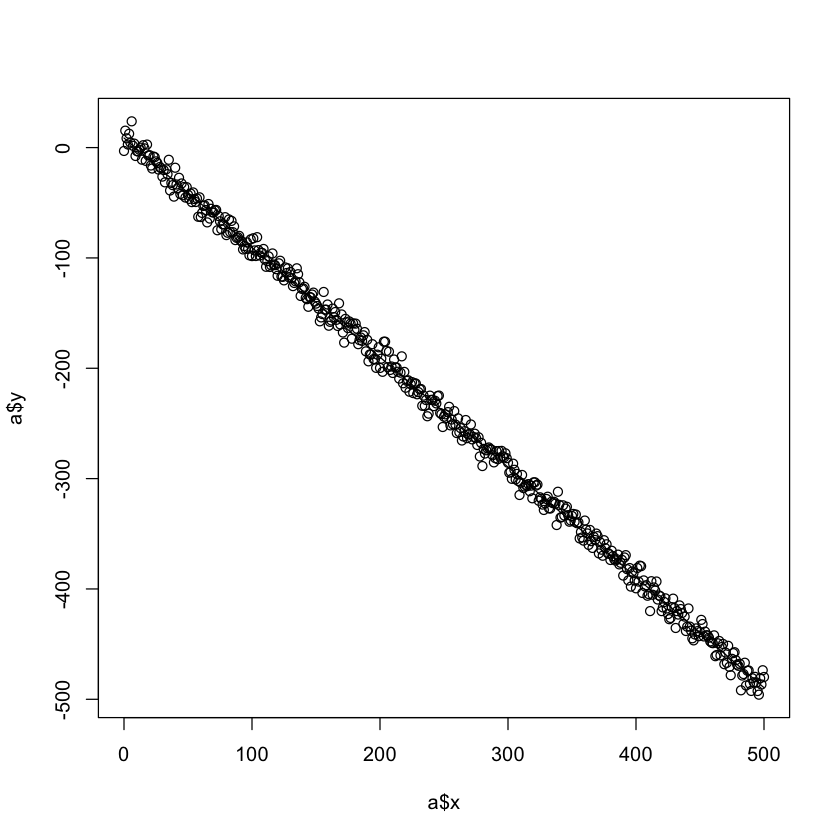

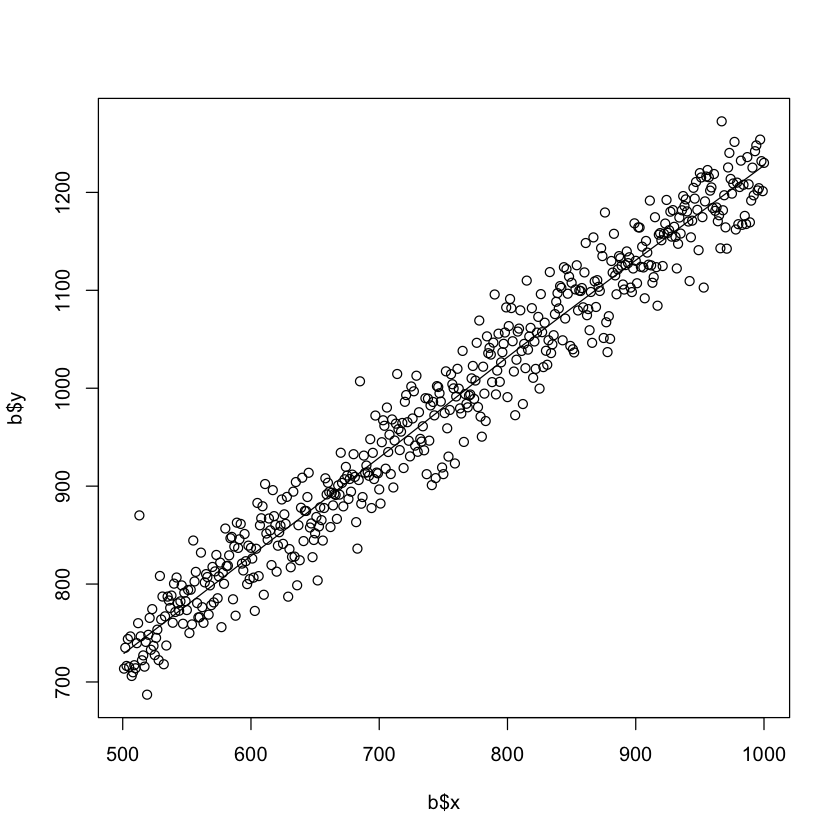

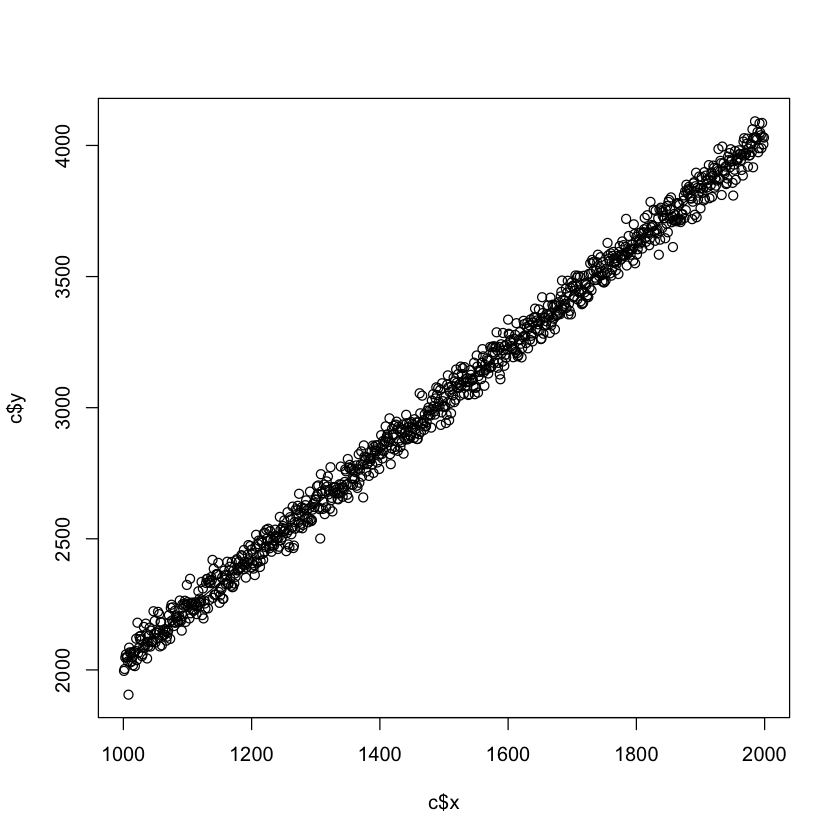

In [7]:
#Graficamos cada tramo por separado:

#Tramo 1
scatter.smooth(x = a$x, y = a$y)
#Tramo 2
scatter.smooth(x = b$x, y = b$y)
#Tramo 3
scatter.smooth(x = c$x, y = c$y)




>d) Utilizando su solución propuesta en c) calcule un intervalo de confianza con un nivel de 90%, 95% y 99% de confiabilidad cuando X = 749

In [10]:
#Calculamos el valor de y para un x0 = 749 dado.
x0 <- 749
y0 <- funcion_prediccion3(x0)

Un intervalo de predicción de $(1 - \alpha)100%$ para una sola respuesta $y_{0}$ está dado por:

$$ \hat y_{0} - t_{\alpha/2}s\sqrt[]{1 + \frac 1 n + \frac {(x_{0} - \bar x)^2} {S_{xx}}} <  y_{0} < \hat y_{0} + t_{\alpha/2}s\sqrt[]{1 + \frac 1 n + \frac {(x_{0} - \bar x)^2} {S_{xx}}} $$

donde:
$$x_{0}: 749$$
$$\hat y_{0}: funcionprediccion3(x_{0})$$
$$t: distribución \space student$$
$$\alpha: nivel \space significancia$$
$$n: cantidad \space elementos$$
$$s: desviación \space estándar \space muestra$$
$$\bar x: media \space muestral $$
$$S_{xx}: \sum_{i = 1}^{n} = (x_{i} - \bar x)^2$$

In [12]:
#Se aplica filtro para regresión lineal de recta a la que pertenece 749(tramo 2).
tester <- subset(testeo, testeo$x >= 501 & testeo$x < 1001)

#Se calculan todas las variables comunes.
n <- nrow(tester)
s <- sd(tester$y)
barx <- mean(tester$y) 
sxx <- var(tester$y) * n



#Caso 1:    alpha = 10%
alpha <- 0.1
ta <- qt(1 - alpha/2, df = n-1)

liminf <- y0 - ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
limsup <- y0 + ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
cat("Para nivel confianza 90%, el intervalo es: ", liminf, "," ,limsup,"\n")

#Caso 2:    alpha = 5%
alpha <- 0.05
ta <- qt(1 - alpha/2, df = n-1)

liminf <- y0 - ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
limsup <- y0 + ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
cat("Para nivel confianza 95%, el intervalo es: ", liminf, "," ,limsup, "\n")

#Caso 3:    alpha = 1%
alpha <- 0.01
ta <- qt(1 - alpha/2, df = n-1)

liminf <- y0 - ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
limsup <- y0 + ta*s*sqrt(1 + 1/n + ((x0 - barx)^2)/sxx)
cat("Para nivel confianza 99%, el intervalo es: ", liminf, "," ,limsup)

Para nivel confianza 90%, el intervalo es:  504.8789 , 993.1669 
Para nivel confianza 95%, el intervalo es:  457.9415 , 1040.104 
Para nivel confianza 99%, el intervalo es:  365.9399 , 1132.106